![Skilledup](logo.png)
For this exercise, you will analyze a dataset from Amazon. The data
format and a sample entry are shown on the next page.

# A. (Suggested duration: 90 mins) 

With the given `data.txt` file for 50000 products, perform exploratory analysis
and make suggestions for further analysis on the following aspects.

## 1. Trustworthiness of Ratings 

Ratings are susceptible to manipulation, bias etc. What can you say
(quantitatively speaking) about the ratings in this dataset?

## 2. Category Bloat 

Consider the product group named `'Books'`. Each product in this group
is associated with categories. Naturally, with categorization, there are
tradeoffs between how broad or specific the categories must be.

For this dataset, quantify the following:

1.  Is there redundancy in the categorization? How can it be
    identified/removed?

2.  Is is possible to reduce the number of categories drastically (say
    to 10% of existing categories) by sacrificing relatively few
    category entries (say close to 10%)?

# B. (Suggested duration: 30 mins)

Give the number crunching a rest! Just think about these problems.

## 1. Algorithm Thinking 

How would build the product categorization from scratch, using
similar/co-purchased information?

## 2. Product Thinking 

Now, put on your 'product thinking' hat.

1.  Is it a good idea to show users the categorization hierarchy for
    items?

2.  Is it a good idea to show users similar/co-purchased items?

3.  Is it a good idea to show users reviews and ratings for items?

4.  For each of the above, why? How will you establish the same?

# Data Entry Format

-   `Id`: Product id (number 0, ..., 50000)

-   `ASIN`: Amazon Standard Identification Number

-   `title`: Name/title of the product

-   `group`: Product group (Book, DVD, Video or Music)

-  `salesrank`: Amazon Salesrank 

-   `similar`: ASINs of co-purchased products (people who buy X also
    buy Y)

-   `categories`: Location in product category hierarchy to which the
    product belongs (separated by |, category id in [])

-   `reviews`: Product review information: time, user id, rating,
    total number of votes on the review, total number of helpfulness
    votes (how many people found the review to be helpful)

## Sample Data Entry
```
Id:   15
ASIN: 1559362022
  title: Wake Up and Smell the Coffee
  group: Book
  salesrank: 518927
  similar: 5  1559360968  1559361247  1559360828  1559361018  0743214552
  categories: 3
   |Books[283155]|Subjects[1000]|Literature & Fiction[17]|Drama[2159]|United States[2160]
   |Books[283155]|Subjects[1000]|Arts & Photography[1]|Performing Arts[521000]|Theater[2154]|General[2218]
   |Books[283155]|Subjects[1000]|Literature & Fiction[17]|Authors, A-Z[70021]|( B )[70023]|Bogosian, Eric[70116]
  reviews: total: 8  downloaded: 8  avg rating: 4
    2002-5-13  cutomer: A2IGOA66Y6O8TQ  rating: 5  votes:   3  helpful:   2
    2002-6-17  cutomer: A2OIN4AUH84KNE  rating: 5  votes:   2  helpful:   1
    2003-1-2  cutomer: A2HN382JNT1CIU  rating: 1  votes:   6  helpful:   1
    2003-6-7  cutomer: A2FDJ79LDU4O18  rating: 4  votes:   1  helpful:   1
    2003-6-27  cutomer: A39QMV9ZKRJXO5  rating: 4  votes:   1  helpful:   1
    2004-2-17  cutomer:  AUUVMSTQ1TXDI  rating: 1  votes:   2  helpful:   0
    2004-2-24  cutomer: A2C5K0QTLL9UAT  rating: 5  votes:   2  helpful:   2
    2004-10-13  cutomer:  A5XYF0Z3UH4HB  rating: 5  votes:   1  helpful:   1
```
Data source:
[http://snap.stanford.edu/data/amazon-meta.html](http://snap.stanford.edu/data/amazon-meta.html])


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_list=[]
values = []
key= 'Header'
with open('data.txt', encoding="utf8") as fp:
    for line in fp:
        if "Id:" in line:
            master_list.append([key,values])
            key = line.rstrip('\n')[line.find(':')+1:]
            values =[]
        else:
            values.append(line.rstrip('\n'))
master_list.append([key,values])

In [3]:
df=pd.DataFrame(master_list[1:])

In [4]:
df.columns = ['Id','txt']

In [5]:
def split_parts(text):
    review_dict={}
    i=0
    while i<len(text):
        line=text[i]
        i=i+1
        if line.find('Id:')>=0:
            review_dict['Id']=line[line.find(':')+1:]
        if line.find('ASIN:')==0:
            review_dict['ASIN']=line[line.find(':')+1:]
        if line.find('group:')>=0:
            review_dict['group']=line[line.find(':')+1:]
        if line.find('salesrank:')>=0:
            review_dict['salesrank']=line[line.find(':')+1:]
        if line.find('title:')>=0:
            review_dict['title']=line[line.find(':')+1:]
        if line.find('categories:')>=0:
            all_cat=[]
            catExists=True
            while ((i<len(text)) & (catExists)):
                line=text[i]
                if line.find('reviews:')>0:
                    catExists=False
                else:
                    all_cat.append(line)
                i=i+1
            review_dict['categories']=all_cat
        if line.find('reviews:')>0:
            review_dict['total_reviews']=line[line.find('total:')+6:line.find('downloaded:')]
            review_dict['downloads']=line[line.find('ded:')+4:line.find('avg ra')]
            review_dict['avg_rating']=line[line.find('ting:')+5:]
            all_reviews=[]
            while i<len(text):
                line=text[i]
                all_reviews.append(line)
                i=i+1
            review_dict['reviews']=all_reviews
    return review_dict

In [6]:
df.iloc[2:7]['txt'].map(lambda x:split_parts(x)).apply(pd.Series)

,ASIN,title,group,salesrank,categories,total_reviews,downloads,avg_rating,reviews
2,0738700797,Candlemas: Feast of Flames,Book,168596,[ |Books[283155]|Subjects[1000]|Religion & S...,12,12,4.5,[ 2001-12-16 cutomer: A11NCO6YTE4BTJ rati...
3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,[ |Books[283155]|Subjects[1000]|Home & Garde...,1,1,5,[ 2003-7-10 cutomer: A3IDGASRQAW8B2 ratin...
4,0842328327,Life Application Bible Commentary: 1 and 2 Ti...,Book,631289,[ |Books[283155]|Subjects[1000]|Religion & S...,1,1,4,[ 2004-8-19 cutomer: A2591BUPXCS705 ratin...
5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,[ |Books[283155]|Subjects[1000]|Religion & S...,0,0,0,[]
6,0486220125,How the Other Half Lives: Studies Among the T...,Book,188784,[ |Books[283155]|Subjects[1000]|Arts & Photo...,17,17,4,[ 1997-7-4 cutomer: ATVPDKIKX0DER rating...


In [7]:
df_reviews=df['txt'].map(lambda x:split_parts(x)).apply(pd.Series)

In [8]:
df_reviews.head(3)

,ASIN,title,group,salesrank,categories,total_reviews,downloads,avg_rating,reviews
0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,[ |Books[283155]|Subjects[1000]|Religion & S...,2,2,5,[ 2000-7-28 cutomer: A2JW67OY8U6HHK ratin...
2,0738700797,Candlemas: Feast of Flames,Book,168596,[ |Books[283155]|Subjects[1000]|Religion & S...,12,12,4.5,[ 2001-12-16 cutomer: A11NCO6YTE4BTJ rati...


In [9]:
#reviews with Null rating are discontinued products
len(df_reviews[df_reviews.avg_rating.isnull()])

542

In [10]:
df_reviews[df_reviews.avg_rating.isnull()].head(3)

,ASIN,title,group,salesrank,categories,total_reviews,downloads,avg_rating,reviews
0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1892866315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,B00004TAU6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#exclude discont products
df_reviews=df_reviews[~df_reviews.avg_rating.isnull()]

In [12]:
len(df_reviews)

49459

In [13]:
df_reviews.group.unique()

array([' Book', ' Music', ' DVD', ' Video', ' Toy'], dtype=object)

In [14]:
df_reviews[['group','avg_rating']].groupby('group').size()

group
 Book     35783
 DVD       1791
 Music     9556
 Toy          2
 Video     2327
dtype: int64

In [15]:
valid_group=[' Book', ' Music', ' DVD', ' Video']

In [16]:
#include only reviews for Books, Music, DVD and Video
df_reviews=df_reviews[df_reviews.group.isin(valid_group)]

In [17]:
df_reviews['avg_rating']=df_reviews['avg_rating'].str.strip().astype(float)

In [18]:
df_reviews['salesrank'].isnull().sum()

0

In [19]:
df_reviews['salesrank']=df_reviews['salesrank'].astype(int)

In [20]:
df_reviews['total_reviews'].isnull().sum()

0

In [21]:
df_reviews['total_reviews']=df_reviews['total_reviews'].astype(int)

In [22]:
df_reviews[['group','avg_rating']].groupby('group')['avg_rating'].mean()

group
 Book     2.942193
 DVD      3.674484
 Music    3.561846
 Video    3.490976
Name: avg_rating, dtype: float64

In [23]:
df_reviews[df_reviews.group.str.strip()=='Book'].describe()

,salesrank,total_reviews,avg_rating
count,3.578300e+04,35783.000000,35783.000000
mean,6.456282e+05,11.625884,2.942193
std,6.169291e+05,75.848385,2.098792
min,-1.000000e+00,0.000000,0.000000
25%,2.068095e+05,0.000000,0.000000
50%,4.837440e+05,2.000000,4.000000
75%,8.724045e+05,6.000000,5.000000
max,3.793303e+06,5539.000000,5.000000


In [24]:
#salesrank < 1 - probable error in the data
len(df_reviews[df_reviews.salesrank<0])

49

In [25]:
#remove the rows with salesrank <-1
df_reviews = df_reviews[~(df_reviews.salesrank<0)]

In [26]:
len(df_reviews)

49408

In [27]:
#let us look at the data for books
df_reviews[df_reviews.group.str.strip()=='Book'].describe()

,salesrank,total_reviews,avg_rating
count,3.574600e+04,35746.000000,35746.000000
mean,6.462965e+05,11.636127,2.944973
std,6.168984e+05,75.886316,2.097813
min,1.900000e+01,0.000000,0.000000
25%,2.076790e+05,0.000000,0.000000
50%,4.843320e+05,2.000000,4.000000
75%,8.730682e+05,6.000000,5.000000
max,3.793303e+06,5539.000000,5.000000


In [28]:
#let us look at the data for Music
df_reviews[df_reviews.group==' Music'].describe()

,salesrank,total_reviews,avg_rating
count,9545.000000,9545.000000,9545.000000
mean,156173.450393,13.740597,3.565427
std,137656.564106,52.453685,1.883886
min,75.000000,0.000000,0.000000
25%,48889.000000,1.000000,3.500000
50%,117423.000000,3.000000,4.500000
75%,227462.000000,9.000000,5.000000
max,661808.000000,1695.000000,5.000000


In [29]:
df_reviews[(df_reviews.salesrank>0) & (df_reviews.salesrank<11)]

,ASIN,title,group,salesrank,categories,total_reviews,downloads,avg_rating,reviews
28339,6301627024,Shirley Valentine,Video,2,[ |[139452]|VHS[404272]|Actors & Actresses[1...,64,64,5.0,[ 1999-1-16 cutomer: AFOOFG7PGFAP3 ratin...


In [30]:
book_review_df=df_reviews[df_reviews.group==' Book']

In [31]:
len(book_review_df)

35746

In [32]:
music_review_df=df_reviews[df_reviews.group==' Music']

In [33]:
len(music_review_df)

9545

In [34]:
dvd_review_df=df_reviews[df_reviews.group==' DVD']

In [35]:
len(dvd_review_df)

1791

In [36]:
video_review_df=df_reviews[df_reviews.group==' Video']

In [37]:
len(video_review_df)

2326

### Trustworthiness of ratings
_Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively speaking) about the ratings in this dataset?_

From the given data, we can say that the rating of a product is not trustworthy if there are unusually high number of positive reviews that do not correspond to a high salesrank.



/opt/homebrew/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


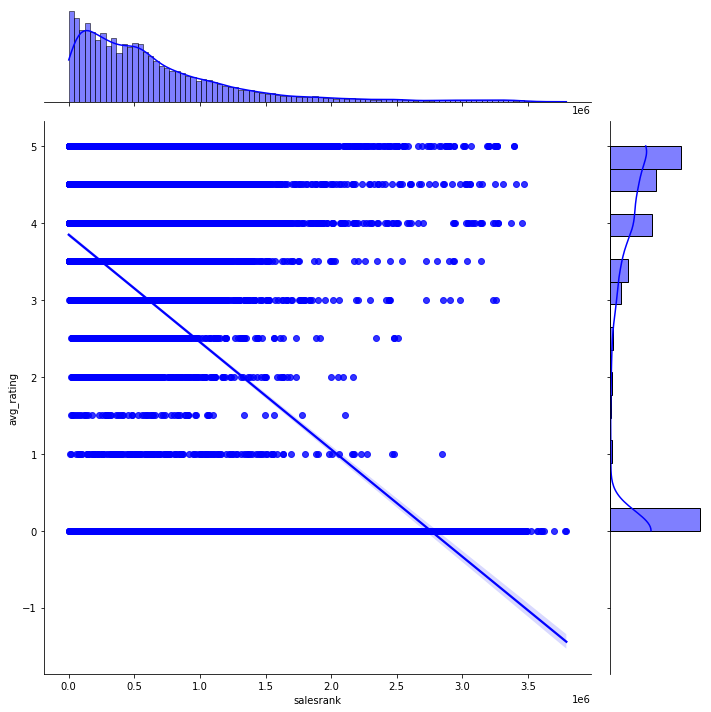

In [38]:
sns.jointplot(book_review_df['salesrank'], book_review_df['avg_rating'],  kind="reg", color="b", size=10)
#plt.savefig('actor1_corr.jpg')
plt.show()

From the above we see that there is a strong correlation between the salesrank and the average rating. From this, we can reasonably say that if an item ranks very low in the salesrank (i.e. has a high absolute value or sells very less compared to other items) but has an unusually high rating, it could be something to investigate

In [39]:
# from the above cells, we know that the 75th percentile is 8.550255e+05
# let us see how many books that have a sales rank above this but have an avg rating of 4 or greater
# and has at least more than 10 reviews - this to account for books that have very unique readers
book_review_df[(book_review_df['salesrank']>855025)&(book_review_df['avg_rating']>=4)&(book_review_df['total_reviews']>10)][['title','salesrank','total_reviews','avg_rating']]

,title,salesrank,total_reviews,avg_rating
198,Imitation of Christ,933676,39,4.5
329,James Joyce (Penguin Lives (Audio)),1204592,14,4.5
481,A Major Case: A Novel by Pete Deer,2860756,14,4.5
935,Frederick,1035931,19,4.5
1819,Light House,861412,21,4.0
...,...,...,...,...
49142,You Are Special,1110681,136,5.0
49353,Finn,989807,12,4.5
49355,The Travels of Marco Polo,1725058,20,4.0
49406,Passing (Modern Library),1037894,21,4.5


***
### Category bloat
_Consider the product group named 'Books'. Each product in this group is associated with categories. Naturally, with categorization, there are tradeoffs between how broad or specific the categories must be._

_For this dataset, quantify the following:_
1. Is there redundancy in the categorization? How can it be identified/removed?
2. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?

***
Let us look at the categories

In [40]:
book_review_df['categories'].iloc[0]

['   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
 '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]']

In [41]:
book_review_df['categories'].iloc[10]

['   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Cooking by Ingredient[4208]|Herbs, Spices & Condiments[4211]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|General[4233]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Special Diet[4317]|Diabetic & Sugar-Free[4318]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Special Diet[4317]|Low Fat[4323]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Nutrition[282861]|General[4628]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low Carbohydrate[4639]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low Sugar[4642]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low-Fat Diet[282849]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Diets[4615]|Low Carb[109246

In [42]:
book_review_df['categories'].iloc[100]

["   |Books[283155]|Subjects[1000]|Children's Books[4]|Literature[2966]|Action & Adventure[2967]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Science, Nature & How It Works[3207]|Fiction[3228]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Series[3302]|Early Reader[3315]|Magic School Bus[3324]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Ages 4-8[2785]|Picture Books[170061]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Authors & Illustrators, A-Z[170540]|( C )[170543]|Cole, Joanna[170637]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Authors & Illustrators, A-Z[170540]|( D )[170544]|Degen, Bruce[170651]",
 '   |Books[283155]|Formats[504358]|Libros en español[301731]|Infantil y juvenil[301735]|No ficción[301737]',
 '   |Books[283155]|Formats[504358]|Libros en español[301731]|Infantil y juvenil[301735]|4 a 8 años[301739]']

From the above, we see that there are multiple categories that are repeated in the same pattern. To find out if we can reduce the redundancy, find out the distribution of the sub-categories within the category list. There may be some subcategories that figure in only a few books. By finding if there are such categories, we can reduce category bloat 

In [43]:
all_cat_list=[]
tot_cat_list=0
for item in book_review_df['categories']:
    for cat_list in item:
        tot_cat_list=tot_cat_list+1
        for c in (cat_list[4:].strip().split('|')):
            all_cat_list.append(c)

In [44]:
len(all_cat_list)

711342

In [45]:
tot_cat_list

129854

In [46]:
len(book_review_df)

35746

There are a total of 393188 books reviewed; 1,439,885 grouping of categories across these books 

In [47]:
len(set(all_cat_list))

10600

14,922 unique categories used

In [48]:
cat_df=pd.DataFrame(all_cat_list)

In [49]:
cat_df.columns=['Category']

In [50]:
cat_counts_df=pd.DataFrame(cat_df.groupby('Category').size().sort_values()).reset_index()

In [51]:
cat_counts_df.columns=['Category','Count']

In [52]:
cat_counts_df.Count.sum()

711342

In [53]:
cat_counts_df[cat_counts_df.Count<=1]

,Category,Count
0,"van Kampen, Vlasta[1044082]",1
1,"Martin, George R.R.[15583]",1
2,"Martin, Dean[917194]",1
3,Colorado Springs[640602],1
4,Colorado Springs[67474],1
...,...,...
2405,"Rubens, Peter Paul[1402]",1
2406,"Rowling, J.K.[287174]",1
2407,Avi[912660],1
2408,Rocky Mountains[16512],1


We see that there are 1104 out of 14,922 occur only once in the categorization. Hence by looking at this distribution it is possible to reduce the number of categorizations without reducing the overall specificity.

***

### Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?

By using clustering algorithms, we can create clusters of items that the customers bought together. This would give a different view of product categorization. However, the usefulness of such categorization should be evaluated. For example, while this approach may help someone who would like to buy a diaper bag and diapers, it may not help someone who is trying to compare different brands of diapers. 


### 2. Product thinking
Now, put on your 'product thinking' hat.
a. Is it a good idea to show users the categorization hierarchy for items?
b. Is it a good idea to show users similar/co-purchased items?
c. Is it a good idea to show users reviews and ratings for items?
d. For each of the above, why? How will you establish the same?

a. Is it a good idea to show users the categorization hierarchy for items?

It depends on the item and the level of search the customer is looking for. For example, someone who is going to buy any phone as long as it is cheap would not be helped by a hierarchial categorization. Heirarchial categorization is useful when someone is looking for a specific product and its closest alternatives.

b. Is it a good idea to show users similar/co-purchased items?

It usually is. There are certain types of items that people typically purchase together and showing them together acts as a reminder that the customer needs to get the other item as well. Common example, phones and memory cards

c. Is it a good idea to show users reviews and ratings for items?

In most cases, yes it is. However, there may be certain drawbacks of this approach. Using the ratings allows one to manipulate the perception of the product quality. Also, showing reviews / ratings means that badly rated products / non-rated products would not get as much as air-time as other products. They may not be sold as much as it should have been.